In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import make_scorer
from tqdm import tqdm
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing
from tqdm import tqdm
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
import glob
import matplotlib.pyplot as plt

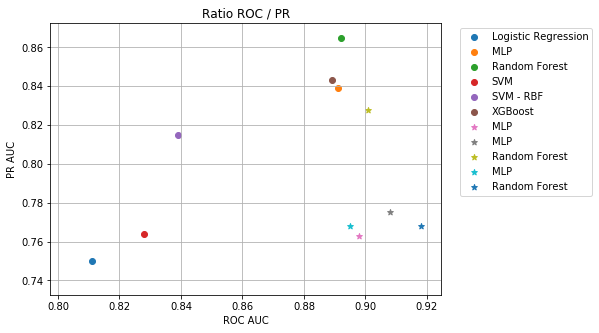

In [25]:
scores = glob.glob("scores/*/*.npy")

mk = {
    "original": "o",
    "over" : "*"
}

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for s in scores:
    score = np.load(s)
    if "SVM_RBF" in s:
        s = s.replace("SVM_RBF", "SVM - RBF")
#     print("roc auc : ", score[0])
#     print("pr auc : ", score[2])
#     print("time : ", score[4], " ", score[5])
#     print(" ")
    nm=s.replace(".npy", "").split("\\")[-1].split("_")[-1]
    if score[0] > 0.7 and score[2] > 0.7:
        ax.scatter(score[0], score[2], label=nm, marker=mk[s.split("\\")[1]])
ax.legend(loc=0, bbox_to_anchor=(1.40,1))
ax.set_title("Ratio ROC / PR")
ax.set_ylabel("PR AUC")
ax.set_xlabel("ROC AUC")
ax.grid(True)

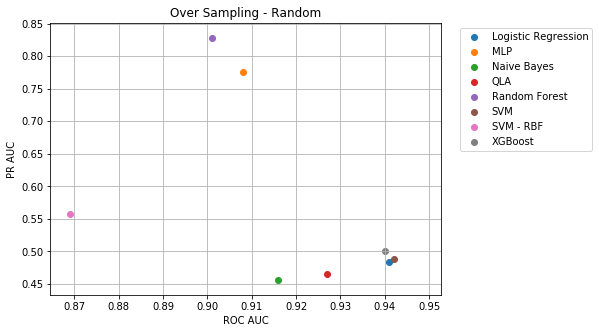

In [43]:
scores = glob.glob("scores/over/random_*.npy")

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for s in scores:
    score = np.load(s)
    if "SVM_RBF" in s:
        s = s.replace("SVM_RBF", "SVM - RBF")
#     print("roc auc : ", score[0])
#     print("pr auc : ", score[2])
#     print("time : ", score[4], " ", score[5])
#     print(" ")
    nm=s.replace(".npy", "").split("/")[-1].split("_")[-1]
    ax.scatter(score[0], score[2], label=nm)
ax.legend(loc=1, bbox_to_anchor=(1.40,1))
ax.set_title("Over Sampling - Random")
ax.set_ylabel("PR AUC")
ax.set_xlabel("ROC AUC")
ax.grid(True)

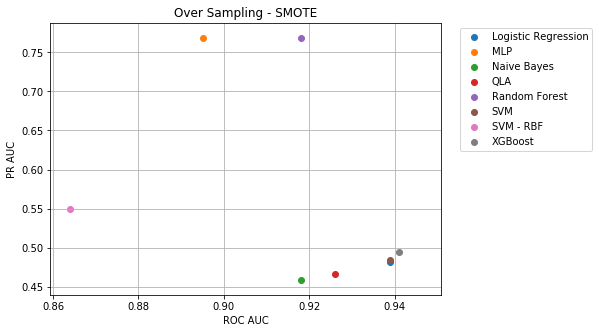

In [44]:
scores = glob.glob("scores/over/SMOTE_*.npy")

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for s in scores:
    score = np.load(s)
    if "SVM_RBF" in s:
        s = s.replace("SVM_RBF", "SVM - RBF")
#     print("roc auc : ", score[0])
#     print("pr auc : ", score[2])
#     print("time : ", score[4], " ", score[5])
#     print(" ")
    nm=s.replace(".npy", "").split("/")[-1].split("_")[-1]
    ax.scatter(score[0], score[2], label=nm)
ax.legend(loc=1, bbox_to_anchor=(1.40,1))
ax.set_title("Over Sampling - SMOTE")
ax.set_ylabel("PR AUC")
ax.set_xlabel("ROC AUC")
ax.grid(True)

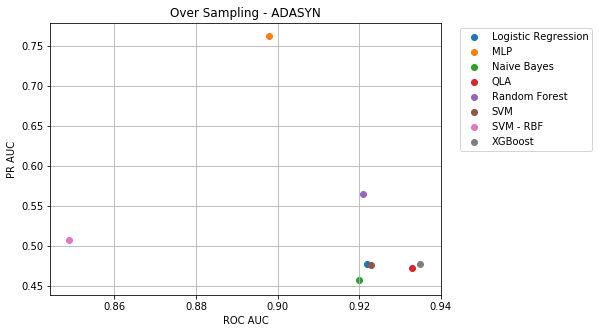

In [45]:
scores = glob.glob("scores/over/ADASYN_*.npy")

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for s in scores:
    score = np.load(s)
    if "SVM_RBF" in s:
        s = s.replace("SVM_RBF", "SVM - RBF")
#     print("roc auc : ", score[0])
#     print("pr auc : ", score[2])
#     print("time : ", score[4], " ", score[5])
#     print(" ")
    nm=s.replace(".npy", "").split("/")[-1].split("_")[-1]
    ax.scatter(score[0], score[2], label=nm)
ax.legend(loc=1, bbox_to_anchor=(1.40,1))
ax.set_title("Over Sampling - ADASYN")
ax.set_ylabel("PR AUC")
ax.set_xlabel("ROC AUC")
ax.grid(True)

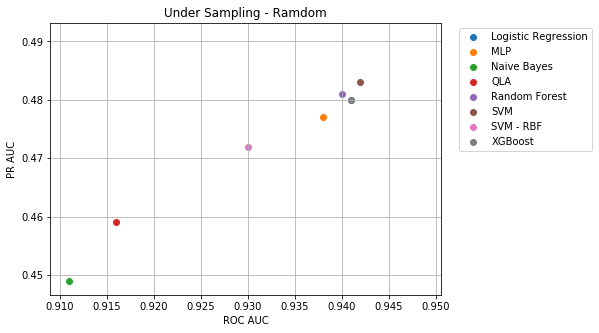

In [47]:
scores = glob.glob("scores/under/random_*.npy")

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for s in scores:
    score = np.load(s)
    if "SVM_RBF" in s:
        s = s.replace("SVM_RBF", "SVM - RBF")
#     print("roc auc : ", score[0])
#     print("pr auc : ", score[2])
#     print("time : ", score[4], " ", score[5])
#     print(" ")
    nm=s.replace(".npy", "").split("/")[-1].split("_")[-1]
    ax.scatter(score[0], score[2], label=nm)
ax.legend(loc=1, bbox_to_anchor=(1.40,1))
ax.set_title("Under Sampling - Ramdom")
ax.set_ylabel("PR AUC")
ax.set_xlabel("ROC AUC")
ax.grid(True)

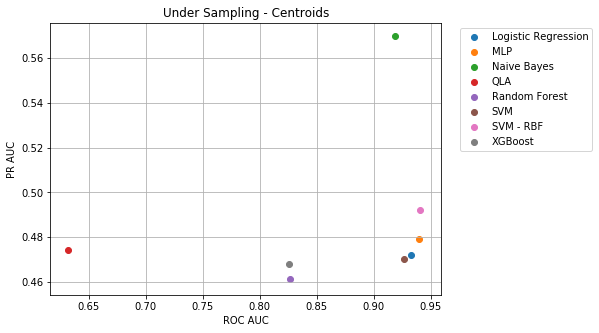

In [48]:
scores = glob.glob("scores/under/centroids_*.npy")

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for s in scores:
    score = np.load(s)
    if "SVM_RBF" in s:
        s = s.replace("SVM_RBF", "SVM - RBF")
#     print("roc auc : ", score[0])
#     print("pr auc : ", score[2])
#     print("time : ", score[4], " ", score[5])
#     print(" ")
    nm=s.replace(".npy", "").split("/")[-1].split("_")[-1]
    ax.scatter(score[0], score[2], label=nm)
ax.legend(loc=1, bbox_to_anchor=(1.40,1))
ax.set_title("Under Sampling - Centroids")
ax.set_ylabel("PR AUC")
ax.set_xlabel("ROC AUC")
ax.grid(True)

In [2]:
scores = glob.glob("scores/original/*.npy")
for s in scores:
    print(" ------------ ", s.split("/")[-1], " -------------------")
    score = np.load(s)
    print("roc auc : ", score[0], "(+/-",score[1],")")
    print("pr auc : ", score[2], "(+/-",score[3],")")
    print(" moyen perf : ", (score[0]+score[2])/2)
    print("time : ", score[4], " ", score[5])
    print(" ")

 ------------  original\original_Logistic Regression.npy  -------------------
roc auc :  0.811 (+/- 0.04 )
pr auc :  0.75 (+/- 0.05 )
 moyen perf :  0.7805
time :  8.11   8.11
 
 ------------  original\original_MLP.npy  -------------------
roc auc :  0.891 (+/- 0.03 )
pr auc :  0.839 (+/- 0.05 )
 moyen perf :  0.865
time :  36.9   36.9
 
 ------------  original\original_Naive Bayes.npy  -------------------
roc auc :  0.904 (+/- 0.03 )
pr auc :  0.446 (+/- 0.04 )
 moyen perf :  0.675
time :  0.35   0.35
 
 ------------  original\original_QLA.npy  -------------------
roc auc :  0.925 (+/- 0.03 )
pr auc :  0.466 (+/- 0.03 )
 moyen perf :  0.6955
time :  0.57   0.57
 
 ------------  original\original_Random Forest.npy  -------------------
roc auc :  0.892 (+/- 0.03 )
pr auc :  0.865 (+/- 0.04 )
 moyen perf :  0.8785000000000001
time :  17.29   17.29
 
 ------------  original\original_SVM.npy  -------------------
roc auc :  0.828 (+/- 0.09 )
pr auc :  0.764 (+/- 0.1 )
 moyen perf :  0.796
t

In [3]:
scores = glob.glob("scores/over/*.npy")
for s in scores:
    print(" ------------ ", s.split("/")[-1], " -------------------")
    score = np.load(s)
    print("roc auc : ", score[0], "(+/-",score[1],")")
    print("pr auc : ", score[2], "(+/-",score[3],")")
    print(" moyen perf : ", (score[0]+score[2])/2)
    print("time : ", score[4], " ", score[5])
    print(" ")

 ------------  over\ADASYN_Logistic Regression.npy  -------------------
roc auc :  0.922 (+/- 0.02 )
pr auc :  0.477 (+/- 0.02 )
 moyen perf :  0.6995
time :  11.64   16.09
 
 ------------  over\ADASYN_MLP.npy  -------------------
roc auc :  0.898 (+/- 0.03 )
pr auc :  0.763 (+/- 0.05 )
 moyen perf :  0.8305
time :  72.58   77.16
 
 ------------  over\ADASYN_Naive Bayes.npy  -------------------
roc auc :  0.92 (+/- 0.03 )
pr auc :  0.458 (+/- 0.03 )
 moyen perf :  0.6890000000000001
time :  0.47   4.92
 
 ------------  over\ADASYN_QLA.npy  -------------------
roc auc :  0.933 (+/- 0.03 )
pr auc :  0.473 (+/- 0.03 )
 moyen perf :  0.7030000000000001
time :  0.99   5.5
 
 ------------  over\ADASYN_Random Forest.npy  -------------------
roc auc :  0.921 (+/- 0.02 )
pr auc :  0.565 (+/- 0.04 )
 moyen perf :  0.743
time :  20.99   25.53
 
 ------------  over\ADASYN_SVM.npy  -------------------
roc auc :  0.923 (+/- 0.02 )
pr auc :  0.476 (+/- 0.02 )
 moyen perf :  0.6995
time :  236.44   24

In [4]:
scores = glob.glob("scores/under/*.npy")
for s in scores:
    print(" ------------ ", s.split("/")[-1], " -------------------")
    score = np.load(s)
    print("roc auc : ", score[0], "(+/-",score[1],")")
    print("pr auc : ", score[2], "(+/-",score[3],")")
    print(" moyen perf : ", (score[0]+score[2])/2)
    print("time : ", score[4], " ", score[5])
    print(" ")

 ------------  under\centroids_Logistic Regression.npy  -------------------
roc auc :  0.933 (+/- 0.02 )
pr auc :  0.472 (+/- 0.02 )
 moyen perf :  0.7025
time :  0.8   80.0
 
 ------------  under\centroids_MLP.npy  -------------------
roc auc :  0.94 (+/- 0.02 )
pr auc :  0.479 (+/- 0.02 )
 moyen perf :  0.7095
time :  0.91   80.0
 
 ------------  under\centroids_Naive Bayes.npy  -------------------
roc auc :  0.919 (+/- 0.03 )
pr auc :  0.57 (+/- 0.04 )
 moyen perf :  0.7444999999999999
time :  0.05   80.0
 
 ------------  under\centroids_QLA.npy  -------------------
roc auc :  0.632 (+/- 0.02 )
pr auc :  0.474 (+/- 0.02 )
 moyen perf :  0.5529999999999999
time :  0.05   80.0
 
 ------------  under\centroids_Random Forest.npy  -------------------
roc auc :  0.827 (+/- 0.03 )
pr auc :  0.461 (+/- 0.03 )
 moyen perf :  0.644
time :  0.24   80.0
 
 ------------  under\centroids_SVM.npy  -------------------
roc auc :  0.927 (+/- 0.03 )
pr auc :  0.47 (+/- 0.03 )
 moyen perf :  0.6985
tim